In [1]:
import pandas as pd
import numpy as np
import statistics
import sklearn.metrics
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings("ignore")

In [2]:
def get_accuracy(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    num_correct_ann= annotation_df[annotation_df[correct_id_col]==annotation_df[predicted_id_col]].shape[0]
    acc=num_correct_ann/annotation_df.shape[0]
    return acc

In [3]:
def get_balanced_accuracy_verbose(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    ann=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        cell_type_sub = annotation_df[annotation_df[correct_id_col]==cell_type]
        print(cell_type)
        num_cells =cell_type_sub.shape[0]
        print("predicted cell ID")
        num_correct_ann = cell_type_sub[cell_type_sub[predicted_id_col]==cell_type].shape[0]
        #print(cell_type_sub.predicted_cellID.value_counts())
        perc=(num_correct_ann/num_cells)
        print(perc)
        ann.append(perc)
    balanced_accuracy= np.sum(ann)/len(ann)
    print("balanced accuracy:")
    print(balanced_accuracy)
    return balanced_accuracy

In [4]:
def get_balanced_accuracy(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    ann=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        cell_type_sub = annotation_df[annotation_df[correct_id_col]==cell_type]
        num_cells =cell_type_sub.shape[0]
        num_correct_ann = cell_type_sub[cell_type_sub[predicted_id_col]==cell_type].shape[0]
        #print(cell_type_sub.predicted_cellID.value_counts())
        perc=(num_correct_ann/num_cells)
        ann.append(perc)
    balanced_accuracy= np.sum(ann)/len(ann)
    return balanced_accuracy

In [5]:
def get_cluster_accuracy(annotation_df, cluster_id_column ='clust',correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    correc_ann_counter=0
    annotation_df = annotation_df.groupby(cluster_id_column).filter(lambda x: len(x) > 10)
    cluster_ids =sorted(set(annotation_df[cluster_id_column]))
    for cluster_id in cluster_ids:
        cluster_sub = annotation_df[annotation_df[cluster_id_column]==cluster_id]   
        clust_real_id_counts = cluster_sub[correct_id_col].value_counts()
        # sort fist by number then by index, then get the cell type with the highest occurance. This takes care of ties
        clust_real_id = clust_real_id_counts.iloc[np.lexsort((clust_real_id_counts.index, -clust_real_id_counts.values))].index[0]
        clust_predicted_id_counts = cluster_sub[predicted_id_col].value_counts()
        # sort fist by number then by index, then get the cell type with the highest occurance. This takes care of ties
        clust_predicted_id = clust_predicted_id_counts.iloc[np.lexsort((clust_predicted_id_counts.index, -clust_predicted_id_counts.values))].index[0]
        if clust_real_id == clust_predicted_id:
            correc_ann_counter += 1
        else:
            continue
    clust_accuracy= correc_ann_counter/len(cluster_ids)
    return clust_accuracy

In [6]:
def get_cohens_kappa_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    cohens_kappa_score= sklearn.metrics.cohen_kappa_score(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(cohens_kappa_score)

In [7]:
def get_F1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    F1_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest 
        # then convert df labels to binary classification tasks
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        #cell_type_sub = cell_type_sub[[correct_id_col, predicted_id_col]]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        F1_cell_type = sklearn.metrics.f1_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        F1_list.append(F1_cell_type)
    return(F1_list)

In [8]:
def get_macroF1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID', label_list=None):
    if label_list ==None:
        label_list  = annotation_df[correct_id_col].value_counts().index   
    macroF1_score = sklearn.metrics.f1_score(annotation_df[correct_id_col], annotation_df[predicted_id_col],average='macro', labels=label_list)
    return(macroF1_score)


In [9]:
def get_medianF1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    F1_scores = get_F1_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianF1_score = statistics.median(F1_scores)
    return(medianF1_score)

In [10]:
def get_precision_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    precision_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        precision_cell_type = sklearn.metrics.precision_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        precision_list.append(precision_cell_type)
    return(precision_list)

In [11]:
def get_medianPrecision_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    precision_scores = get_precision_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianPrecision_score = statistics.median(precision_scores)
    return(medianPrecision_score)

In [12]:
def get_recall_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    recall_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        recall_cell_type = sklearn.metrics.recall_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        recall_list.append(recall_cell_type)
    return(recall_list)

In [13]:
def get_medianRecall_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    recall_scores = get_recall_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianPrecision_score = statistics.median(recall_scores)
    return(medianPrecision_score)

In [14]:
def get_adjusted_rand_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    adjusted_rand_score= sklearn.metrics.adjusted_rand_score(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(adjusted_rand_score)

In [15]:
def get_mathews_corr_coef_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    matthews_corrcoef_score= sklearn.metrics.matthews_corrcoef(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(matthews_corrcoef_score)

In [16]:
def get_common_cells(*dataframes):
    df_cell_list = [v.index for v in dataframes]
    common_cells= list(set.intersection(*map(set,df_cell_list)))
    return(common_cells)

In [17]:
def get_combined_annotations_df_for_common_cells(*frames, common_cells, cell_ID_column = "cell_IDs"):
    if not frames:
        return None
    if len(frames) == 1:
        return frames[0]
    out = frames[0]
    out = out.loc[common_cells,]
    for df in frames[1:]:
        out = out.merge(df.loc[common_cells,], on=cell_ID_column)
    return out

In [18]:
def plot_performance_metrics(df , colors=None, labels = None, y_min = 0.0, frame_color = 'gray', frame_width = 0.5, x_label_rotation = 45, tick_size = 14,legend_fontsize = 12,
                            legend_labels = None, legend_loc = 'upper center', legend_bbox_to_anchor=(0.5, -0.2), legend_ncol=4, save=False, save_path=None):

    # Default values
    default_colors = ['#5E0B8A', '#00A7E1', '#BDDA57', '#FF8C00']
    default_labels = ['accuracy', 'balanced accuracy','cluster accuracy', 'macro F1', 'median F1',
                      'median precision', 'median recall','MCC', 'ARI', "Cohen's kappa"]
    default_legend_labels =['scATAcat', 'Seurat label transfer', 'Cellcano', 'EpiAnno']

    # Use default if None is passed
    colors = default_colors if colors is None else colors
    labels = default_labels if labels is None else labels
    legend_labels = default_legend_labels if legend_labels is None else legend_labels
  
    df.columns = labels
    df.index = legend_labels
    
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    n_bins = 100  # Increase this number for a smoother gradient
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)
    ax = df.T.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12, colormap=cmap)
    ax.set_ylim(ymin=y_min)
    # Change plot frame to gray and adjust linewidth
    spine_color = 'gray'
    linewidth = frame_width # Adjust the linewidth as needed
    for spine in ax.spines.values():
        spine.set_color(spine_color)
        spine.set_linewidth(linewidth)
    ax.legend(legend_labels,fontsize=legend_fontsize, loc=legend_loc, bbox_to_anchor=legend_bbox_to_anchor,
          fancybox=False, shadow=False, ncol=legend_ncol, frameon=False)
    plt.xticks(rotation=45)
    plt.tick_params(axis='both', which='major', labelsize=tick_size)

    if save == False:
        plt.show()
    else:
        if save_path == None:
            print("specify the save_path directory")
        else:
            plt.savefig(save_path, bbox_inches='tight', transparent=True)

### seurat annotations

In [19]:
data_dir = "../../../../results/Fig1_Fig2_Fig3_SFig1-FACS_BM_scATAC/"
data_dir_scATAcat = "../../../results/Fig1_Fig2_Fig3_SFig1-FACS_BM_scATAC/Fig1_SFig1-apply_scATAcat/"
leiden_key = 'leiden_1.0'

In [20]:
#labelTransfer_annotations = pd.read_csv(data_dir+"Fig3-apply_seurat_label_transfer/buenrostro2018_Seurat4_labeltransfer_metadata.csv", header=0)
labelTransfer_annotations = pd.read_csv(data_dir + "Fig3-apply_seurat_label_transfer/buenrostro2018_Seurat4_labeltransfer_bm_ref_ony_progenitor_metadata.csv", header=0)
labelTransfer_annotations = labelTransfer_annotations[['Unnamed: 0','orig.ident', 'predicted.celltype.l2']]
labelTransfer_annotations.columns = ['cell_IDs','orig.ident', 'predicted.celltype.l2']
labelTransfer_annotations.index = labelTransfer_annotations.cell_IDs
labelTransfer_annotations.index.name = None
labelTransfer_annotations.head()

,cell_IDs,orig.ident,predicted.celltype.l2
CLP_0,CLP_0,CLP,GMP
CLP_1,CLP_1,CLP,Prog_B 1
CMP_0,CMP_0,CMP,GMP
CMP_1,CMP_1,CMP,GMP
CMP_2,CMP_2,CMP,GMP


In [21]:
labelTransfer_annotations['predicted.celltype.l2'].value_counts()

predicted.celltype.l2
Prog_RBC    666
GMP         646
Prog_DC     259
Prog_B 1    129
HSC         106
LMPP        101
Prog_B 2     88
Prog_Mk      22
Name: count, dtype: int64

In [22]:
seurat_l2_annotations = ['CD4 Naive','Prog_B 1','CD4 Memory','Prog_RBC','CD8 Memory_2','Memory B','NK','CD14 Mono','CD8 Naive','CD8 Effector_2','Naive B','HSC','MAIT','pDC','GMP','CD16 Mono','gdT','Prog_B 2','LMPP','CD8 Effector_1','Prog_DC','Plasmablast','cDC2','Prog_Mk','CD56 bright NK','CD8 Memory_1']

seurat_l2_annotations_simplified  =['CD4Tcell' , "CLP", 'CD4Tcell', "MEP", "CD8Tcell", "Bcell", "NKcell", "Mono", "CD8Tcell", "CD8Tcell", "Bcell", 'HSC/MPP', 'MAIT','pDC','GMP', "Mono", 'gdT', 'CLP', 'LMPP', 'CD8Tcell', "GMP", 'Plasmablast', 'cDC2', "MEP", "NKcell", 'CD8Tcell']

seurat_l2_annotations_to_simplified_dict = dict(zip(seurat_l2_annotations, seurat_l2_annotations_simplified))

print(seurat_l2_annotations_to_simplified_dict)



{'CD4 Naive': 'CD4Tcell', 'Prog_B 1': 'CLP', 'CD4 Memory': 'CD4Tcell', 'Prog_RBC': 'MEP', 'CD8 Memory_2': 'CD8Tcell', 'Memory B': 'Bcell', 'NK': 'NKcell', 'CD14 Mono': 'Mono', 'CD8 Naive': 'CD8Tcell', 'CD8 Effector_2': 'CD8Tcell', 'Naive B': 'Bcell', 'HSC': 'HSC/MPP', 'MAIT': 'MAIT', 'pDC': 'pDC', 'GMP': 'GMP', 'CD16 Mono': 'Mono', 'gdT': 'gdT', 'Prog_B 2': 'CLP', 'LMPP': 'LMPP', 'CD8 Effector_1': 'CD8Tcell', 'Prog_DC': 'GMP', 'Plasmablast': 'Plasmablast', 'cDC2': 'cDC2', 'Prog_Mk': 'MEP', 'CD56 bright NK': 'NKcell', 'CD8 Memory_1': 'CD8Tcell'}


In [23]:
labelTransfer_annotations = labelTransfer_annotations.assign(labelTransfer_predicted_celltype_l2_simplified=list(labelTransfer_annotations['predicted.celltype.l2'].map(seurat_l2_annotations_to_simplified_dict)))

In [24]:
labelTransfer_annotations

,cell_IDs,orig.ident,predicted.celltype.l2,labelTransfer_predicted_celltype_l2_simplified
CLP_0,CLP_0,CLP,GMP,GMP
CLP_1,CLP_1,CLP,Prog_B 1,CLP
CMP_0,CMP_0,CMP,GMP,GMP
CMP_1,CMP_1,CMP,GMP,GMP
CMP_2,CMP_2,CMP,GMP,GMP
...,...,...,...,...
LMPP_91,LMPP_91,LMPP,Prog_DC,GMP
LMPP_92,LMPP_92,LMPP,Prog_RBC,MEP
LMPP_93,LMPP_93,LMPP,GMP,GMP
LMPP_94,LMPP_94,LMPP,Prog_DC,GMP


In [25]:
labelTransfer_annotations['predicted.celltype.l2'].value_counts()

predicted.celltype.l2
Prog_RBC    666
GMP         646
Prog_DC     259
Prog_B 1    129
HSC         106
LMPP        101
Prog_B 2     88
Prog_Mk      22
Name: count, dtype: int64

In [26]:
labelTransfer_annotations.columns=["cell_IDs","ground_truth", "labelTransfer_predicted", "labelTransfer_predicted_simplified"]
labelTransfer_annotations.head()

,cell_IDs,ground_truth,labelTransfer_predicted,labelTransfer_predicted_simplified
CLP_0,CLP_0,CLP,GMP,GMP
CLP_1,CLP_1,CLP,Prog_B 1,CLP
CMP_0,CMP_0,CMP,GMP,GMP
CMP_1,CMP_1,CMP,GMP,GMP
CMP_2,CMP_2,CMP,GMP,GMP


In [27]:
labelTransfer_annotations.ground_truth.value_counts()

ground_truth
CMP     661
HSC     448
GMP     274
MEP     208
MPP     184
CLP     146
LMPP     96
Name: count, dtype: int64

In [28]:
seurat_integration_annotations = labelTransfer_annotations

### scATAcat annotations

In [29]:
#scATAcat_annotations = pd.read_csv("../../../results/Fig1_Fig2_Fig3_SFig1-FACS_BM_scATAC//Fig1_SFig1-apply_scATAcat/apply_scATAcat_with_Corces2016_prototypes/outputs/scATAcat_annotations.csv")
scATAcat_annotations = pd.read_csv(data_dir_scATAcat + "apply_scATAcat_with_Corces2016_prototypes/outputs/scATAcat_annotations.csv")
scATAcat_annotations.columns = ['cell_IDs',leiden_key, 'scATAcat_annotation' ,'ground_truth_annotations']
scATAcat_annotations.index = scATAcat_annotations.cell_IDs
scATAcat_annotations.index.name = None
scATAcat_annotations.head()

,cell_IDs,leiden_1.0,scATAcat_annotation,ground_truth_annotations
CLP_1,CLP_1,8,CLP,CLP
CMP_0,CMP_0,4,CMP,CMP
CMP_1,CMP_1,4,CMP,CMP
CMP_2,CMP_2,1,CMP,CMP
CMP_3,CMP_3,6,MEP,CMP


In [30]:
# change HSC and MPP to HSC/MPP
scATAcat_annotations = scATAcat_annotations.replace('HSC', 'HSC/MPP')
scATAcat_annotations = scATAcat_annotations.replace('MPP', 'HSC/MPP')
#scATAcat_annotations['scATAcat_annotation'] = scATAcat_annotations['scATAcat_annotation'].map({'HSC': 'HSC/MPP', '<PP': 'HSC/MPP'})
#scATAcat_annotations['ground_truth_annotations'] = scATAcat_annotations['ground_truth_annotations'].map({'HSC': 'HSC/MPP', '<PP': 'HSC/MPP'})


In [31]:
scATAcat_annotations

,cell_IDs,leiden_1.0,scATAcat_annotation,ground_truth_annotations
CLP_1,CLP_1,8,CLP,CLP
CMP_0,CMP_0,4,CMP,CMP
CMP_1,CMP_1,4,CMP,CMP
CMP_2,CMP_2,1,CMP,CMP
CMP_3,CMP_3,6,MEP,CMP
...,...,...,...,...
LMPP_90,LMPP_90,7,LMPP,LMPP
LMPP_91,LMPP_91,7,LMPP,LMPP
LMPP_93,LMPP_93,7,LMPP,LMPP
LMPP_94,LMPP_94,7,LMPP,LMPP


In [32]:
scATAcat_annotations['ground_truth_annotations'].value_counts()

ground_truth_annotations
CMP        645
HSC/MPP    582
GMP        253
MEP        190
CLP        108
LMPP        94
Name: count, dtype: int64

### Cellcano annotations

In [33]:
#Cellcano_annotations = pd.read_csv("/project/scATAC_analysis/scATAcat_review/benchmarking/Cellcano/apply_BM/output_Buenrostro2018_FACS_BM/predict_Buenrostro2018_FACS_BMcelltypes.csv")

In [34]:
Cellcano_annotations = pd.read_csv(data_dir + "Fig1-appy_Cellcano/output_Buenrostro2018_FACS_BM/predict_Buenrostro2018_FACS_BMcelltypes.csv")

In [35]:
Cellcano_annotations.head()

,Unnamed: 0,pred_celltype,firstround_pred_celltype,entropy
0,Corces2018_BM_FACS_scATAC_fragments_reorganize...,MDP,MDP,0.895430
1,Corces2018_BM_FACS_scATAC_fragments_reorganize...,MDP,MDP,0.469363
2,Corces2018_BM_FACS_scATAC_fragments_reorganize...,CLP,CLP,0.756266
3,Corces2018_BM_FACS_scATAC_fragments_reorganize...,MDP,MDP,0.117884
4,Corces2018_BM_FACS_scATAC_fragments_reorganize...,MDP,MDP,1.073732


In [36]:
Cellcano_annotations[['prefix', 'cell_IDs']] = Cellcano_annotations.iloc[:,0].str.split("#", n=1, expand=True)
Cellcano_annotations = Cellcano_annotations[["cell_IDs", "pred_celltype"]]
Cellcano_annotations.columns = ["cell_IDs", "Cellcano_annotations"]
Cellcano_annotations.index =Cellcano_annotations["cell_IDs"]
Cellcano_annotations.index.name = None
Cellcano_annotations.head()

,cell_IDs,Cellcano_annotations
MEP_150,MEP_150,MDP
CMP_239,CMP_239,MDP
HSC_284,HSC_284,CLP
GMP_285,GMP_285,MDP
CMP_164,CMP_164,MDP


In [37]:
Cellcano_annotations.Cellcano_annotations.value_counts()

Cellcano_annotations
LMPP       538
HSC/MPP    448
MEP        235
MDP        224
GMP        154
CMP/BMP    100
Pro-B       99
CLP         65
pDC         11
Pre-B        1
Name: count, dtype: int64

In [38]:
Cellcano_annotations_ = ['HSC/MPP','MEP','CMP/BMP','LMPP','CLP','Pro-B','Pre-B','GMP','MDP','pDC','cDC','Mono1','Mono2','Naive-B','Memory-B','Plasma-B','Basofil','Imm-NK','Mat-NK1','Mat-NK2','N-CD4T1','N-CD4T2','N-Treg','M-CD4T','Treg','N-CD8T1','N-CD8T2','N-CD8T3','CM-CD8T','EM-CDT8','GDelta-T']
Cellcano_annotations_simplified  = [ "HSC/MPP","MEP","CMP","LMPP","CLP","CLP","CLP","GMP","GMP","pDC","cDC","Mono","Mono","Bcell","Bcell","Bcell","Basofil","NKcell","NKcell","NKcell","CD4Tcell","CD4Tcell","Treg","CD4Tcell","Treg","CD8Tcell","CD8Tcell","CD8Tcell","CD8Tcell","CD8Tcell","gdT"]
Cellcano_annotations_simplified_dict = dict(zip(Cellcano_annotations_, Cellcano_annotations_simplified))

print(Cellcano_annotations_simplified_dict)

{'HSC/MPP': 'HSC/MPP', 'MEP': 'MEP', 'CMP/BMP': 'CMP', 'LMPP': 'LMPP', 'CLP': 'CLP', 'Pro-B': 'CLP', 'Pre-B': 'CLP', 'GMP': 'GMP', 'MDP': 'GMP', 'pDC': 'pDC', 'cDC': 'cDC', 'Mono1': 'Mono', 'Mono2': 'Mono', 'Naive-B': 'Bcell', 'Memory-B': 'Bcell', 'Plasma-B': 'Bcell', 'Basofil': 'Basofil', 'Imm-NK': 'NKcell', 'Mat-NK1': 'NKcell', 'Mat-NK2': 'NKcell', 'N-CD4T1': 'CD4Tcell', 'N-CD4T2': 'CD4Tcell', 'N-Treg': 'Treg', 'M-CD4T': 'CD4Tcell', 'Treg': 'Treg', 'N-CD8T1': 'CD8Tcell', 'N-CD8T2': 'CD8Tcell', 'N-CD8T3': 'CD8Tcell', 'CM-CD8T': 'CD8Tcell', 'EM-CDT8': 'CD8Tcell', 'GDelta-T': 'gdT'}


In [39]:

Cellcano_annotations= Cellcano_annotations.assign(Cellcano_annotations_simplified=list(Cellcano_annotations['Cellcano_annotations'].map(Cellcano_annotations_simplified_dict)))
Cellcano_annotations.head()

,cell_IDs,Cellcano_annotations,Cellcano_annotations_simplified
MEP_150,MEP_150,MDP,GMP
CMP_239,CMP_239,MDP,GMP
HSC_284,HSC_284,CLP,CLP
GMP_285,GMP_285,MDP,GMP
CMP_164,CMP_164,MDP,GMP


### EpiAnno annotations

In [40]:
EpiAnno_annotations = pd.read_csv(data_dir + "Fig1-apply_EpiAnno/predicted_labels.csv", index_col=0)
EpiAnno_annotations.columns = ["cell_IDs", "EpiAnno_annotations"]
EpiAnno_annotations.index =EpiAnno_annotations["cell_IDs"]
EpiAnno_annotations.index.name = None


In [41]:
EpiAnno_annotations.head()

,cell_IDs,EpiAnno_annotations
MEP_150,MEP_150,MEP
CMP_239,CMP_239,GMP
HSC_284,HSC_284,CLP
GMP_285,GMP_285,MDP
CMP_164,CMP_164,MEP


In [42]:
EpiAnno_annotations_ = ['HSC/MPP','MEP','CMP/BMP','LMPP','CLP','Pro-B','Pre-B','GMP','MDP','pDC','cDC','Mono1','Mono2','Naive-B','Memory-B','Plasma-B','Basofil','Imm-NK','Mat-NK1','Mat-NK2','N-CD4T1','N-CD4T2','N-Treg','M-CD4T','Treg','N-CD8T1','N-CD8T2','N-CD8T3','CM-CD8T','EM-CDT8','GDelta-T']
EpiAnno_annotations_simplified  =[ "HSC/MPP","MEP","CMP","LMPP","CLP","CLP","CLP","GMP","GMP","pDC","cDC","Mono","Mono","Bcell","Bcell","Bcell","Basofil","NKcell","NKcell","NKcell","CD4Tcell","CD4Tcell","Treg","CD4Tcell","Treg","CD8Tcell","CD8Tcell","CD8Tcell","CD8Tcell","CD8Tcell","gdT"]
EpiAnno_annotations_simplified_dict = dict(zip(EpiAnno_annotations_, EpiAnno_annotations_simplified))

print(EpiAnno_annotations_simplified_dict)

{'HSC/MPP': 'HSC/MPP', 'MEP': 'MEP', 'CMP/BMP': 'CMP', 'LMPP': 'LMPP', 'CLP': 'CLP', 'Pro-B': 'CLP', 'Pre-B': 'CLP', 'GMP': 'GMP', 'MDP': 'GMP', 'pDC': 'pDC', 'cDC': 'cDC', 'Mono1': 'Mono', 'Mono2': 'Mono', 'Naive-B': 'Bcell', 'Memory-B': 'Bcell', 'Plasma-B': 'Bcell', 'Basofil': 'Basofil', 'Imm-NK': 'NKcell', 'Mat-NK1': 'NKcell', 'Mat-NK2': 'NKcell', 'N-CD4T1': 'CD4Tcell', 'N-CD4T2': 'CD4Tcell', 'N-Treg': 'Treg', 'M-CD4T': 'CD4Tcell', 'Treg': 'Treg', 'N-CD8T1': 'CD8Tcell', 'N-CD8T2': 'CD8Tcell', 'N-CD8T3': 'CD8Tcell', 'CM-CD8T': 'CD8Tcell', 'EM-CDT8': 'CD8Tcell', 'GDelta-T': 'gdT'}


In [43]:

EpiAnno_annotations= EpiAnno_annotations.assign(EpiAnno_annotations_simplified=list(EpiAnno_annotations['EpiAnno_annotations'].map(EpiAnno_annotations_simplified_dict)))
EpiAnno_annotations.head()

,cell_IDs,EpiAnno_annotations,EpiAnno_annotations_simplified
MEP_150,MEP_150,MEP,MEP
CMP_239,CMP_239,GMP,GMP
HSC_284,HSC_284,CLP,CLP
GMP_285,GMP_285,MDP,GMP
CMP_164,CMP_164,MEP,MEP


## combine the annotations for the common cells:



In [44]:
EpiAnno_annotations

,cell_IDs,EpiAnno_annotations,EpiAnno_annotations_simplified
MEP_150,MEP_150,MEP,MEP
CMP_239,CMP_239,GMP,GMP
HSC_284,HSC_284,CLP,CLP
GMP_285,GMP_285,MDP,GMP
CMP_164,CMP_164,MEP,MEP
...,...,...,...
CMP_653,CMP_653,CMP/BMP,CMP
HSC_34,HSC_34,HSC/MPP,HSC/MPP
GMP_133,GMP_133,Pro-B,CLP
MEP_221,MEP_221,MEP,MEP


In [45]:
EpiAnno_annotations.EpiAnno_annotations_simplified.value_counts()

EpiAnno_annotations_simplified
MEP        583
HSC/MPP    506
GMP        209
LMPP       178
CLP        169
CMP        154
Mono        34
Bcell       27
pDC         15
Name: count, dtype: int64

In [46]:
common_cells = get_common_cells(scATAcat_annotations, seurat_integration_annotations,Cellcano_annotations, EpiAnno_annotations)

In [47]:
pd.DataFrame(common_cells)

,0
0,MPP_99
1,MEP_214
2,MPP_53
3,HSC_248
4,CLP_103
...,...
1866,HSC_364
1867,MPP_176
1868,CLP_150
1869,CMP_48


In [48]:
pd.DataFrame(common_cells).to_csv(data_dir_scATAcat + "../compare_annotation_performances/commonCells.csv",index=False)

In [49]:
all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(scATAcat_annotations, seurat_integration_annotations,Cellcano_annotations, EpiAnno_annotations, common_cells=common_cells, cell_ID_column = "cell_IDs")

In [50]:
all_methods_for_commonCells.EpiAnno_annotations_simplified.value_counts()

EpiAnno_annotations_simplified
MEP        582
HSC/MPP    506
GMP        207
LMPP       178
CLP        168
CMP        154
Mono        34
Bcell       27
pDC         15
Name: count, dtype: int64

## subset the ground truth to common annotations


In [51]:
common_annotations = list(set(all_methods_for_commonCells.scATAcat_annotation)
                          &set(all_methods_for_commonCells.ground_truth_annotations)
                          &set(all_methods_for_commonCells.labelTransfer_predicted_simplified)
                          &set(all_methods_for_commonCells.Cellcano_annotations_simplified)
                          &set(all_methods_for_commonCells.EpiAnno_annotations_simplified))
common_annotations

['GMP', 'HSC/MPP', 'MEP', 'CLP', 'LMPP']

In [52]:
common_annotations_witho_EpiAnno = list(set(all_methods_for_commonCells.scATAcat_annotation)
                          &set(all_methods_for_commonCells.ground_truth_annotations)
                          &set(all_methods_for_commonCells.labelTransfer_predicted_simplified))
common_annotations_witho_EpiAnno

['GMP', 'HSC/MPP', 'MEP', 'CLP', 'LMPP']

In [53]:
list(set(all_methods_for_commonCells.scATAcat_annotation)
                          &set(all_methods_for_commonCells.ground_truth_annotations)
                          &set(all_methods_for_commonCells.labelTransfer_predicted_simplified)
                          &set(all_methods_for_commonCells.Cellcano_annotations_simplified))

['GMP', 'HSC/MPP', 'MEP', 'CLP', 'LMPP']

In [54]:
all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]

In [55]:

set(all_methods_for_commonCells.Cellcano_annotations_simplified)

{'CLP', 'CMP', 'GMP', 'HSC/MPP', 'LMPP', 'MEP', 'pDC'}

In [56]:
all_methods_for_commonCells_commonAnnotations

,cell_IDs,leiden_1.0,scATAcat_annotation,ground_truth_annotations,ground_truth,labelTransfer_predicted,labelTransfer_predicted_simplified,Cellcano_annotations,Cellcano_annotations_simplified,EpiAnno_annotations,EpiAnno_annotations_simplified
0,MPP_99,3,HSC/MPP,HSC/MPP,MPP,Prog_DC,GMP,HSC/MPP,HSC/MPP,HSC/MPP,HSC/MPP
1,MEP_214,6,MEP,MEP,MEP,Prog_RBC,MEP,MEP,MEP,MEP,MEP
2,MPP_53,0,HSC/MPP,HSC/MPP,MPP,Prog_RBC,MEP,LMPP,LMPP,HSC/MPP,HSC/MPP
3,HSC_248,0,HSC/MPP,HSC/MPP,HSC,Prog_RBC,MEP,LMPP,LMPP,HSC/MPP,HSC/MPP
4,CLP_103,8,CLP,CLP,CLP,Prog_B 2,CLP,Pro-B,CLP,Pro-B,CLP
...,...,...,...,...,...,...,...,...,...,...,...
1865,CLP_102,8,CLP,CLP,CLP,Prog_B 1,CLP,Pro-B,CLP,Pro-B,CLP
1866,HSC_364,3,HSC/MPP,HSC/MPP,HSC,GMP,GMP,HSC/MPP,HSC/MPP,HSC/MPP,HSC/MPP
1867,MPP_176,1,CMP,HSC/MPP,MPP,Prog_RBC,MEP,HSC/MPP,HSC/MPP,HSC/MPP,HSC/MPP
1868,CLP_150,8,CLP,CLP,CLP,Prog_B 2,CLP,Pro-B,CLP,Pro-B,CLP


In [57]:
scores_df = pd.DataFrame(index=["scATAcat", "Seurat_label_transfer", "Cellcano", "EpiAnno"])


In [58]:
all_methods_for_commonCells_commonAnnotations.ground_truth_annotations.value_counts()

ground_truth_annotations
HSC/MPP    581
GMP        253
MEP        190
CLP        108
LMPP        94
Name: count, dtype: int64

## scores only for common cells and common annotation: ['CLP', 'HSC/MPP', 'MEP', 'GMP', 'LMPP'] cells 

In [59]:
scores_df = pd.DataFrame(index=["scATAcat", "Seurat_label_transfer", "Cellcano", "EpiAnno"],
                        columns=["accuracy","balanced_accuracy","cluster_accuracy","macroF1_score","medianF1_score","medianPrecision_score","medianRecall_score","mathews_corr_coef_score","adjusted_rand_score","cohens_kappa_score"])
common_cells = get_common_cells(scATAcat_annotations, seurat_integration_annotations,Cellcano_annotations, EpiAnno_annotations)
all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(scATAcat_annotations, seurat_integration_annotations,Cellcano_annotations, EpiAnno_annotations, common_cells=common_cells, cell_ID_column = "cell_IDs")
common_annotations = list(set(all_methods_for_commonCells.scATAcat_annotation)
                          &set(all_methods_for_commonCells.ground_truth_annotations)
                          &set(all_methods_for_commonCells.labelTransfer_predicted_simplified)
                          &set(all_methods_for_commonCells.Cellcano_annotations_simplified)
                          &set(all_methods_for_commonCells.EpiAnno_annotations_simplified))
all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
annotation_df = all_methods_for_commonCells_commonAnnotations
correct_id_col = 'ground_truth_annotations'
cluster_id_column =leiden_key
for method in scores_df.index:
    if method == "scATAcat":
        predicted_id_col = "scATAcat_annotation"
        scores_df.loc["scATAcat", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["scATAcat", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "Seurat_label_transfer":
        predicted_id_col = "labelTransfer_predicted_simplified"
        scores_df.loc["Seurat_label_transfer", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["Seurat_label_transfer", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "Cellcano":
        predicted_id_col = "Cellcano_annotations_simplified"
        scores_df.loc["Cellcano", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["Cellcano", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "EpiAnno":
        predicted_id_col = "EpiAnno_annotations_simplified"
        scores_df.loc["EpiAnno", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["EpiAnno", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)


In [60]:
scores_df.columns

Index(['accuracy', 'balanced_accuracy', 'cluster_accuracy', 'macroF1_score',
       'medianF1_score', 'medianPrecision_score', 'medianRecall_score',
       'mathews_corr_coef_score', 'adjusted_rand_score', 'cohens_kappa_score'],
      dtype='object')

In [61]:
scores_df

,accuracy,balanced_accuracy,cluster_accuracy,macroF1_score,medianF1_score,medianPrecision_score,medianRecall_score,mathews_corr_coef_score,adjusted_rand_score,cohens_kappa_score
scATAcat,0.908646,0.918125,0.8,0.911042,0.944099,0.958763,0.915663,0.87432,0.828169,0.871916
Seurat_label_transfer,0.43801,0.537538,0.4,0.421871,0.498084,0.428191,0.770751,0.3619,0.117479,0.308946
Cellcano,0.621533,0.691186,0.8,0.651222,0.712018,0.835106,0.638298,0.554986,0.415775,0.520956
EpiAnno,0.779772,0.774714,0.7,0.738445,0.772059,0.68231,0.795181,0.715174,0.634758,0.702959


In [62]:
scores_df

,accuracy,balanced_accuracy,cluster_accuracy,macroF1_score,medianF1_score,medianPrecision_score,medianRecall_score,mathews_corr_coef_score,adjusted_rand_score,cohens_kappa_score
scATAcat,0.908646,0.918125,0.8,0.911042,0.944099,0.958763,0.915663,0.87432,0.828169,0.871916
Seurat_label_transfer,0.43801,0.537538,0.4,0.421871,0.498084,0.428191,0.770751,0.3619,0.117479,0.308946
Cellcano,0.621533,0.691186,0.8,0.651222,0.712018,0.835106,0.638298,0.554986,0.415775,0.520956
EpiAnno,0.779772,0.774714,0.7,0.738445,0.772059,0.68231,0.795181,0.715174,0.634758,0.702959


In [63]:
figures_dir = "../../../results/Fig1_Fig2_Fig3_SFig1-FACS_BM_scATAC/compare_annotation_performances/apply_with_Corces2016_prototypes/figures/"

In [64]:
import os
os.makedirs(figures_dir,exist_ok=True)

In [65]:
def plot_performance_metrics(df , colors=None, labels = None, y_min = 0.0, frame_color = 'gray', frame_width = 0.5, x_label_rotation = 45, tick_size = 14,legend_fontsize = 12,
                            legend_labels = None, legend_loc = 'upper center', legend_bbox_to_anchor=(0.5, -0.2), legend_ncol=4, save=False, save_path=None):

    # Default values
    default_colors = ['#5E0B8A', '#00A7E1', '#BDDA57', '#FF8C00']
    default_labels = ['accuracy', 'balanced \naccuracy','cluster \naccuracy', 'macro \nF1', 'median \nF1',
                      'median \nprecision', 'median \nrecall','MCC', 'ARI', "Cohen's \nkappa"]
    default_legend_labels =['scATAcat', 'Seurat label transfer', 'Cellcano', 'EpiAnno']

    # Use default if None is passed
    colors = default_colors if colors is None else colors
    labels = default_labels if labels is None else labels
    legend_labels = default_legend_labels if legend_labels is None else legend_labels
  
    df.columns = labels
    df.index = legend_labels
    
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    n_bins = 100  # Increase this number for a smoother gradient
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)
    ax = df.T.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12, colormap=cmap)
    ax.set_ylim(ymin=y_min)
    # Change plot frame to gray and adjust linewidth
    spine_color = 'gray'
    linewidth = frame_width # Adjust the linewidth as needed
    for spine in ax.spines.values():
        spine.set_color(spine_color)
        spine.set_linewidth(linewidth)
    ax.legend(legend_labels,fontsize=legend_fontsize, loc=legend_loc, bbox_to_anchor=legend_bbox_to_anchor,
          fancybox=False, shadow=False, ncol=legend_ncol, frameon=False)
    plt.xticks(rotation=x_label_rotation)
    plt.tick_params(axis='both', which='major', labelsize=tick_size)

    if save == False:
        plt.show()
    else:
        if save_path == None:
            print("specify the save_path directory")
        else:
            plt.savefig(save_path, bbox_inches='tight', transparent=True)

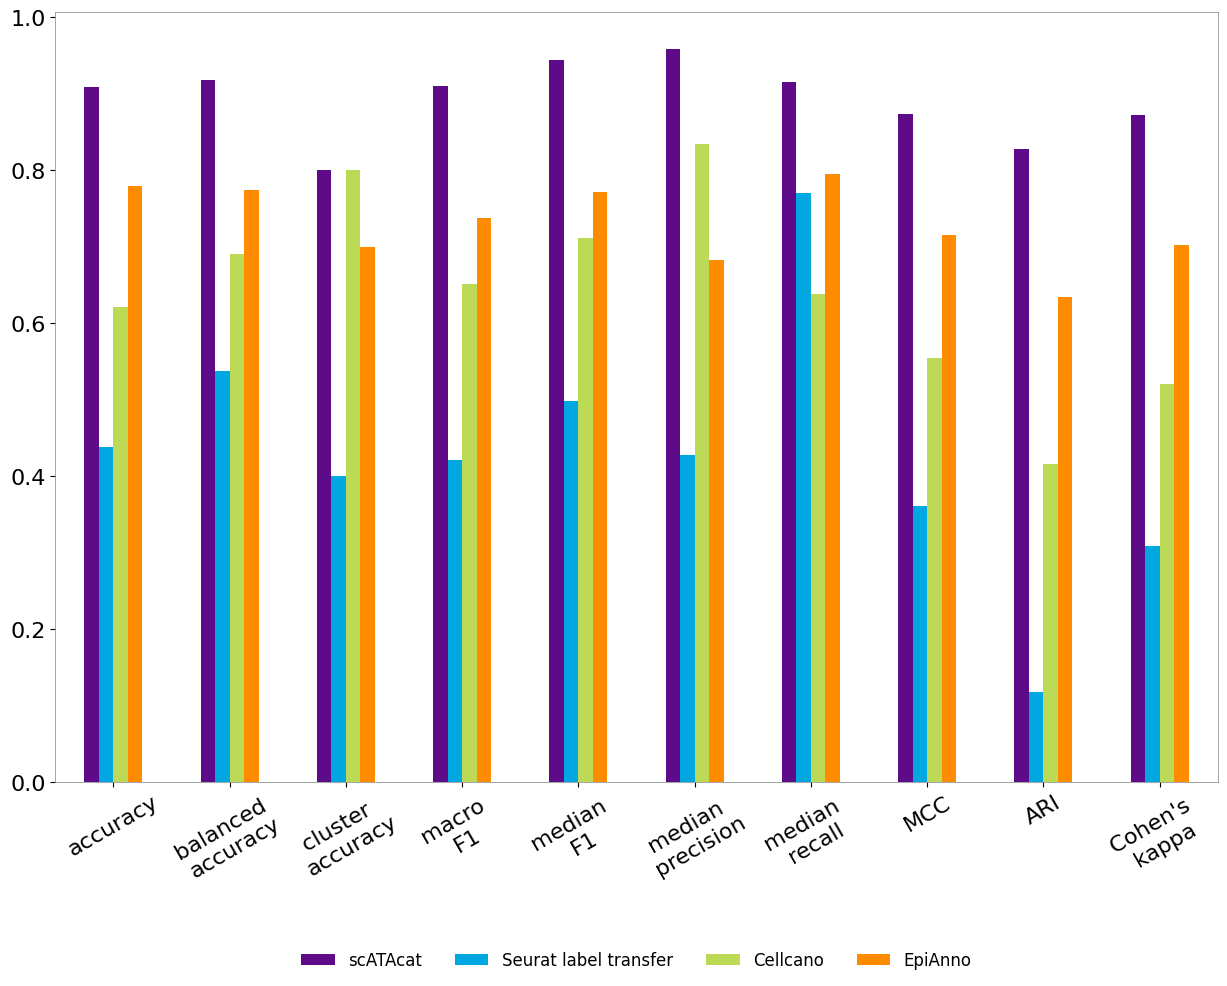

In [66]:
plot_performance_metrics(df = scores_df, save=True, tick_size=16, legend_fontsize=12, x_label_rotation = 30, save_path=figures_dir+ '/common_cells_common_annotations.png')


## scores for common cells & pairwise common for annotations

In [67]:
scores_df = pd.DataFrame(index=["scATAcat", "Seurat_label_transfer", "Cellcano", "EpiAnno"],
                        columns=["accuracy" ,"balanced_accuracy","cluster_accuracy","macroF1_score","medianF1_score","medianPrecision_score","medianRecall_score","mathews_corr_coef_score","adjusted_rand_score","cohens_kappa_score"])
common_cells = get_common_cells(scATAcat_annotations, seurat_integration_annotations,Cellcano_annotations, EpiAnno_annotations)
#all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(scATAcat_annotations, seurat_integration_annotations,Cellcano_annotations, EpiAnno_annotations, common_cells=common_cells, cell_ID_column = "cell_IDs")
correct_id_col = 'ground_truth_annotations'
cluster_id_column =leiden_key
for method in scores_df.index:
    if method == "scATAcat":
        common_annotations = list(set(all_methods_for_commonCells.scATAcat_annotation))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations
        print(annotation_df.shape)
        print(common_annotations)
        predicted_id_col = "scATAcat_annotation"
        scores_df.loc["scATAcat", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["scATAcat", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["scATAcat", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "Seurat_label_transfer":
        # common_cells = get_common_cells(seurat_integration_annotations,ground_truth_annotations_)
        # all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(seurat_integration_annotations,ground_truth_annotations_, common_cells=common_cells, cell_ID_column = "cell_IDs")
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(all_methods_for_commonCells.labelTransfer_predicted_simplified))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations 
        print(annotation_df.shape)
        print(common_annotations)
        predicted_id_col = "labelTransfer_predicted_simplified"
        scores_df.loc["Seurat_label_transfer", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["Seurat_label_transfer", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Seurat_label_transfer", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "Cellcano":
        # common_cells = get_common_cells(Cellcano_annotations,ground_truth_annotations_)
        # all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(Cellcano_annotations,ground_truth_annotations_, common_cells=common_cells, cell_ID_column = "cell_IDs")
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(all_methods_for_commonCells.Cellcano_annotations_simplified))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations  
        print(annotation_df.shape)
        print(common_annotations)
        predicted_id_col = "Cellcano_annotations_simplified"
        scores_df.loc["Cellcano", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["Cellcano", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["Cellcano", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "EpiAnno":
        # common_cells = get_common_cells(EpiAnno_annotations,ground_truth_annotations_)
        # all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(EpiAnno_annotations,ground_truth_annotations_, common_cells=common_cells, cell_ID_column = "cell_IDs")
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(all_methods_for_commonCells.EpiAnno_annotations_simplified))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations
        print(annotation_df.shape)
        print(common_annotations)
        predicted_id_col = "EpiAnno_annotations_simplified"
        scores_df.loc["EpiAnno", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["EpiAnno", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["EpiAnno", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)


(1871, 11)
['HSC/MPP', 'GMP', 'CMP', 'MEP', 'CLP', 'LMPP']
(1226, 11)
['GMP', 'HSC/MPP', 'MEP', 'CLP', 'LMPP']
(1871, 11)
['HSC/MPP', 'GMP', 'CMP', 'MEP', 'CLP', 'LMPP']
(1871, 11)
['HSC/MPP', 'GMP', 'CMP', 'MEP', 'CLP', 'LMPP']


In [68]:
scores_df

,accuracy,balanced_accuracy,cluster_accuracy,macroF1_score,medianF1_score,medianPrecision_score,medianRecall_score,mathews_corr_coef_score,adjusted_rand_score,cohens_kappa_score
scATAcat,0.817745,0.872597,0.9,0.844029,0.831041,0.846028,0.909959,0.768349,0.566785,0.760243
Seurat_label_transfer,0.43801,0.537538,0.4,0.421871,0.498084,0.428191,0.770751,0.3619,0.117479,0.308946
Cellcano,0.433993,0.588908,0.6,0.469329,0.54932,0.530851,0.629426,0.365295,0.210395,0.332426
EpiAnno,0.591662,0.684613,0.7,0.582056,0.575253,0.67965,0.697986,0.548002,0.392151,0.508697


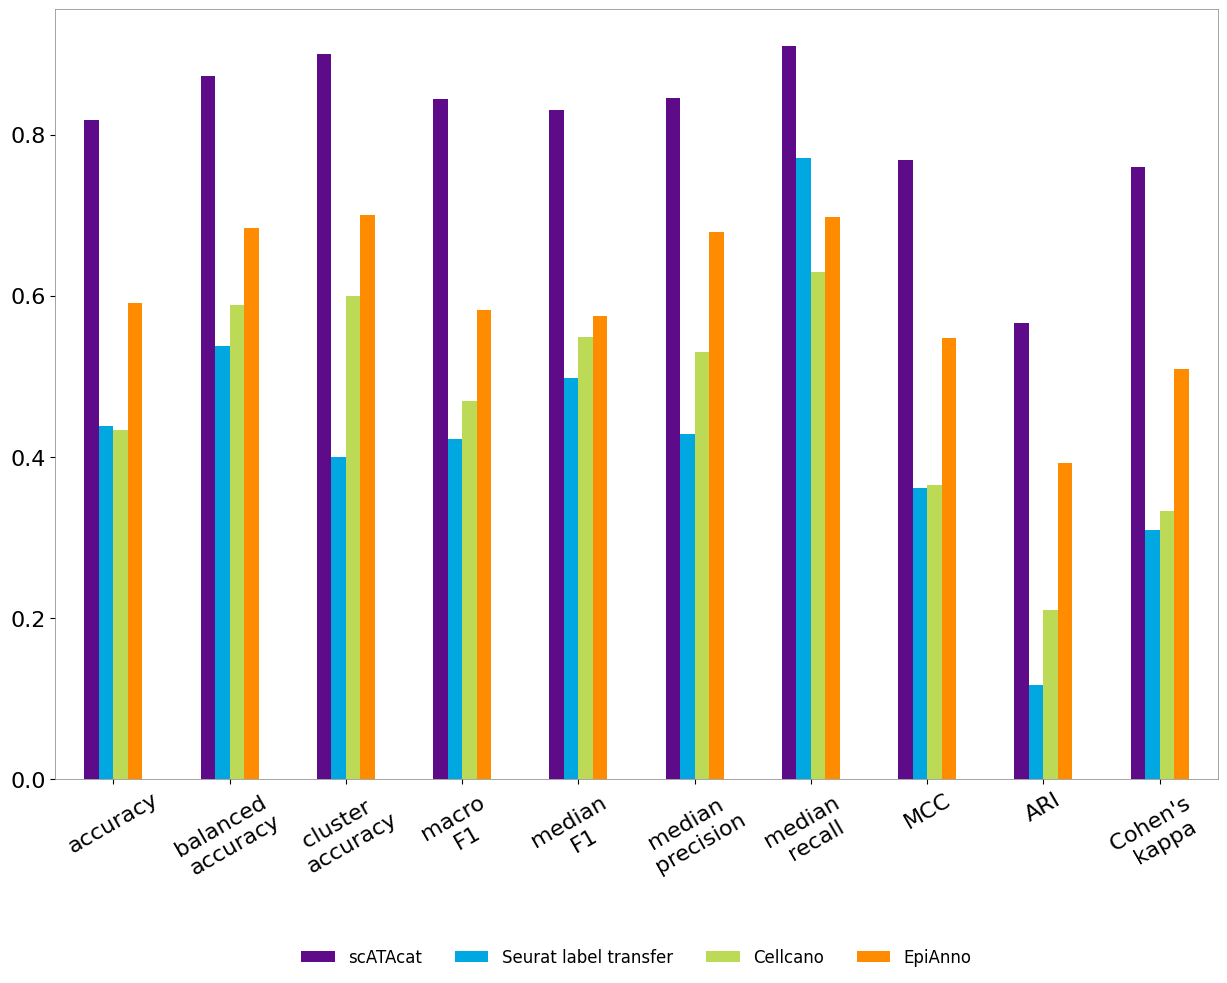

In [69]:
plot_performance_metrics(df = scores_df, save=True, tick_size=16, legend_fontsize=12, x_label_rotation = 30,save_path=figures_dir+ '/common_cells_pairwise_common_annotations.png',)